In [455]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

df1 = pd.read_csv('listing_cleaned.csv')
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6166 entries, 0 to 6165
Data columns (total 35 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   host_listings_count                           6089 non-null   float64
 1   neighbourhood_group_cleansed                  6089 non-null   float64
 2   accommodates                                  6089 non-null   float64
 3   bedrooms                                      6089 non-null   float64
 4   beds                                          6089 non-null   float64
 5   minimum_nights                                6089 non-null   float64
 6   maximum_nights                                6089 non-null   float64
 7   number_of_reviews                             6089 non-null   float64
 8   review_scores_rating                          6089 non-null   float64
 9   calculated_host_listings_count                6089 non-null   f

In [456]:
# Import pandas library
import pandas as pd

# Select the columns you want to keep
selected_columns = ['host_is_superhost', 'host_listings_count', 'host_has_profile_pic', 'host_identity_verified', 
                    'neighbourhood_group_cleansed', 'accommodates', 'bedrooms', 'beds', 'price', 'minimum_nights',
                    'maximum_nights', 'has_availability', 'number_of_reviews', 'review_scores_rating', 
                    'instant_bookable', 'room_type_Entire home/apt', 'bathrooms_number', 'amenities_number',
                    'property_type_wholeUnit', 'distance_from_city_center']

# Create a new DataFrame with the selected columns
df = df1[selected_columns]


In [457]:
df = df.dropna()

In [458]:
# Separate the output variable from the input features
X = df.drop('price', axis=1)  # input features
y = df['price']               # output variable

In [459]:
best_degree

1

In [460]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
linearRegression_mse = mean_squared_error(y_test, lr_model.predict(X_test))
print("Simple linear regression MSE: ", linearRegression_mse)
r2 = r2_score(y_test, y_pred)
print("Simple linear regression r2: ", r2)

Simple linear regression MSE:  0.2729437297563427
Simple linear regression r2:  0.22255969416374322


In [461]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

ridge_model = Ridge(alpha=1)

# Fit the model on the training data
ridge_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = ridge_model.predict(X_test)

# Compute the mean squared error of the predictions
mse = mean_squared_error(y_test, y_pred)

r2 = r2_score(y_test, y_pred)

In [462]:
print("MSE:", mse)

print("R-squared:", r2)

MSE: 0.2729647807465983
R-squared: 0.22152634965001472


In [463]:
def plotCoef(model):
    feature_names = list(X)
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.bar(np.arange(len(model.coef_)), model.coef_)
    ax.set_xticks(np.arange(len(feature_names)))
    ax.set_xticklabels(feature_names, rotation=90)
    ax.set_ylabel('Coefficient Values')
    ax.set_xlabel('Features')
    ax.set_title('Linear Regression Coefficients')
    plt.show()

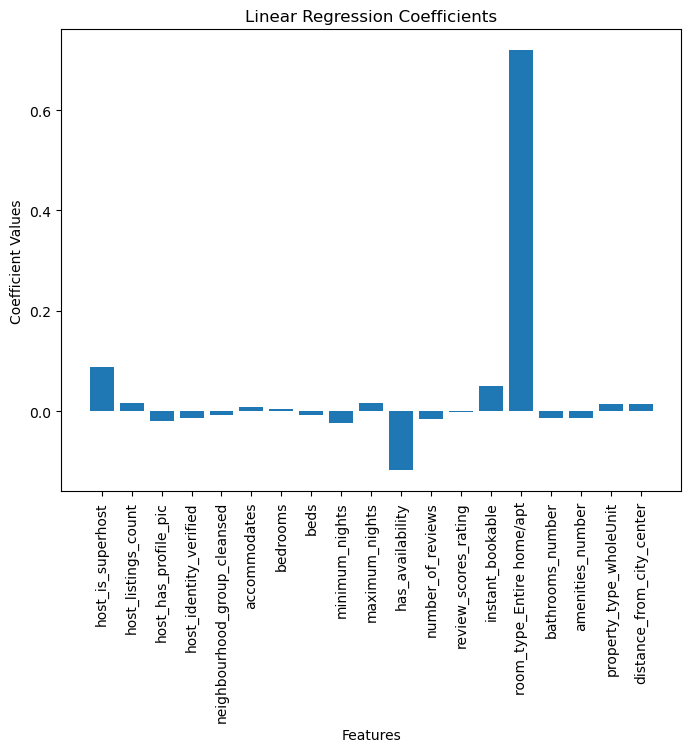

In [464]:
plotCoef(lr_model)

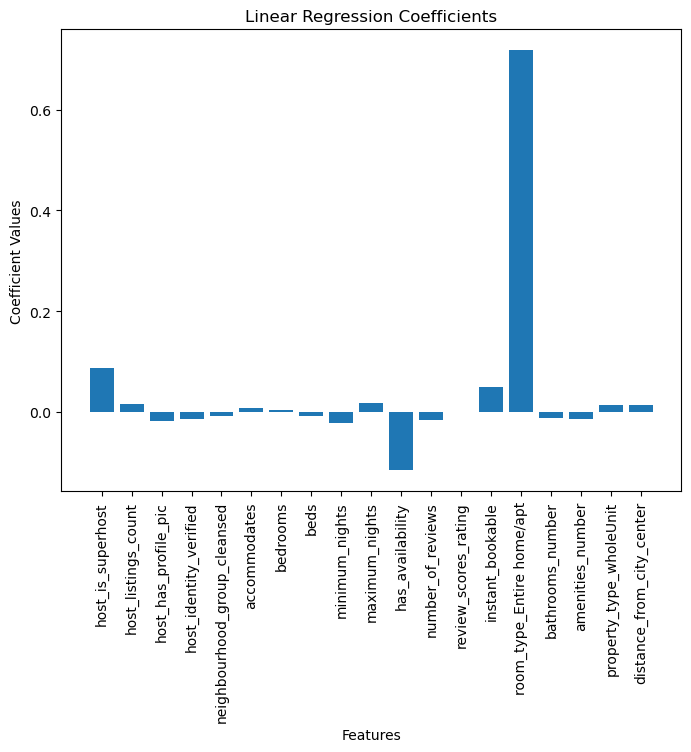

In [465]:
plotCoef(ridge_model)

In [466]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lasso_model = Lasso(alpha=0.003)

# Fit the model on the training data
lasso_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = lasso_model.predict(X_test)

# Compute the mean squared error of the predictions
mse = mean_squared_error(y_test, y_pred)

r2 = r2_score(y_test, y_pred)

print(mse)

print(r2)

0.27260244779095005
0.22255969416374322


In [467]:
print(X_train)

      host_is_superhost  host_listings_count  host_has_profile_pic  \
5711                0.0             0.052652                   1.0   
2338                1.0            -0.725112                   1.0   
2389                1.0             0.420445                   1.0   
1403                0.0            -0.725112                   1.0   
5169                1.0             2.445034                   1.0   
...                 ...                  ...                   ...   
3831                0.0            -0.725112                   1.0   
5265                0.0            -0.725112                   1.0   
5300                0.0             2.639540                   1.0   
5465                0.0            -0.725112                   1.0   
865                 1.0            -0.549108                   1.0   

      host_identity_verified  neighbourhood_group_cleansed  accommodates  \
5711                     1.0                     -0.701308      0.238333   
2338   

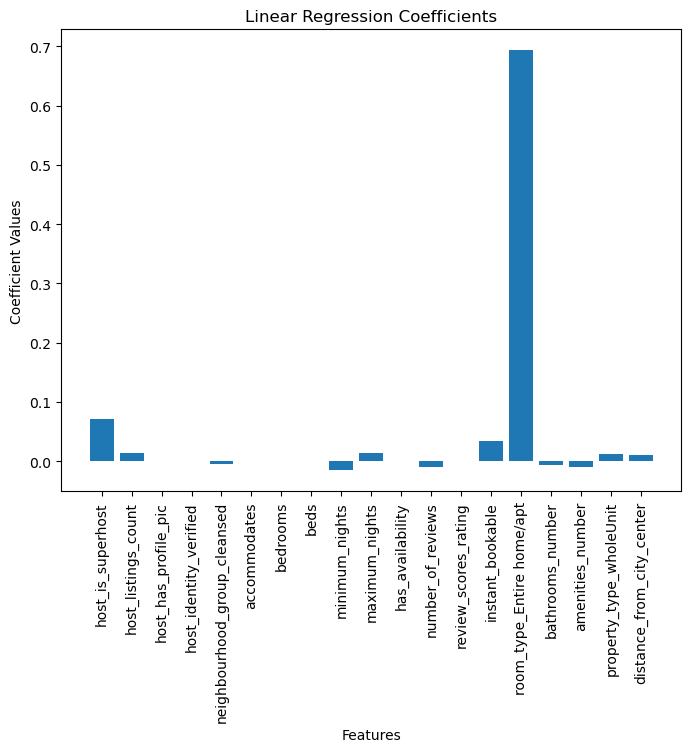

In [468]:
plotCoef(lasso_model)

In [472]:
feature_names = list(X)
coef = lasso_model.coef_
j=0
for i in feature_names:
    print(i)
    print(coef[j])
    j = j + 1

host_is_superhost
0.07152757609590717
host_listings_count
0.013795728347643355
host_has_profile_pic
-0.0
host_identity_verified
-0.0
neighbourhood_group_cleansed
-0.004332016178033073
accommodates
0.0
bedrooms
0.0
beds
-0.0
minimum_nights
-0.015509838480792586
maximum_nights
0.014242368977766783
has_availability
-0.0
number_of_reviews
-0.009225306738782992
review_scores_rating
-0.0
instant_bookable
0.03433377453902418
room_type_Entire home/apt
0.6933207046925917
bathrooms_number
-0.006504529076018379
amenities_number
-0.01035752339964098
property_type_wholeUnit
0.012744527430479696
distance_from_city_center
0.010159968164191437


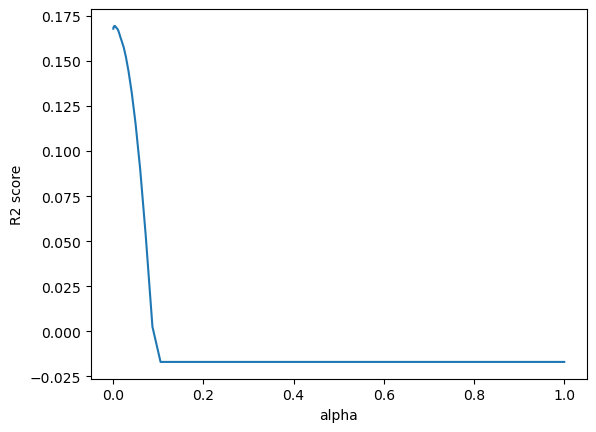

In [470]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the alpha values to test
alphas = np.logspace(-4, 0, 50)

# Create an instance of Lasso regression model
lasso = Lasso()

# Loop over the alpha values and compute the cross-validation score
scores = []
for alpha in alphas:
    lasso.set_params(alpha=alpha)
    score = np.mean(cross_val_score(lasso, X, y, cv=10, scoring='r2'))
    scores.append(score)

# Plot the alpha values vs. the cross-validation scores
import matplotlib.pyplot as plt
plt.plot(alphas, scores)
plt.xlabel('alpha')
plt.ylabel('R2 score')
plt.show()

# Find the best alpha value based on the highest cross-validation score
best_alpha = alphas[np.argmax(scores)]


In [471]:
best_alpha

0.0029470517025518097